# **1. Collect** ***Data***

In [102]:
import pandas as pd
import matplotlib.pyplot as plt

In [103]:
df=pd.read_csv("/content/sample_data/loan_sanction_train.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# ***2. EXplore the Data***

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [105]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


**Box** **plot**

In [106]:
df=df.dropna(subset=["LoanAmount"])
from matplotlib import pyplot as pyplot
import seaborn as sns

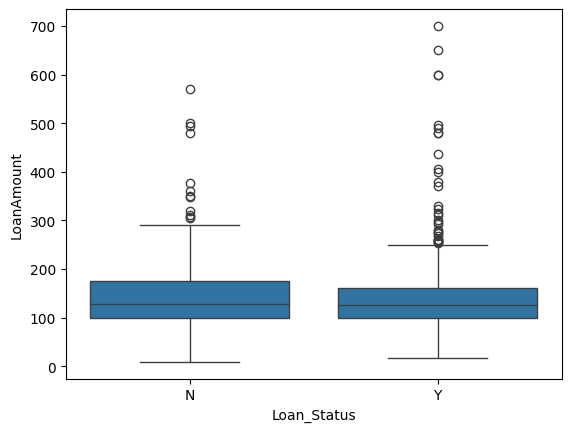

In [107]:
plot=sns.boxplot(data=df, x="Loan_Status", y="LoanAmount")

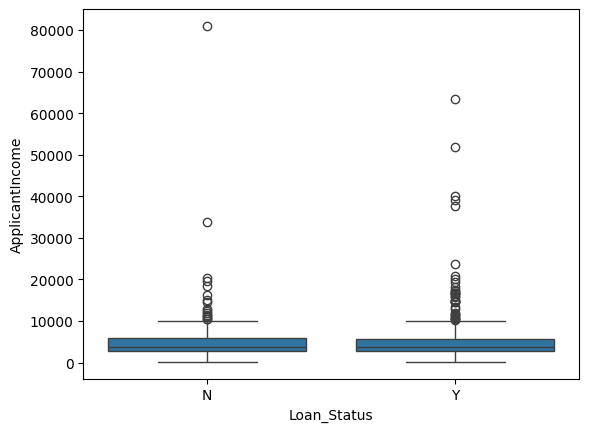

In [108]:
plot=sns.boxplot(data=df, x="Loan_Status", y="ApplicantIncome")

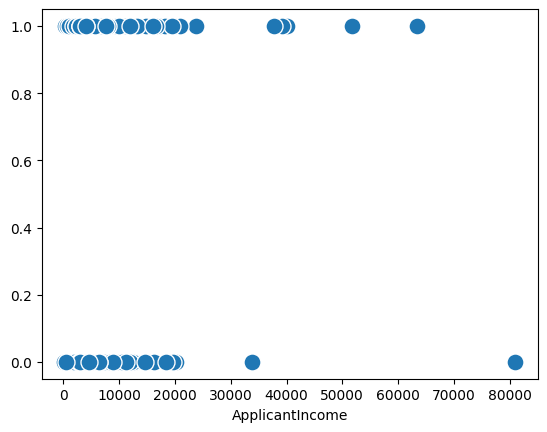

In [109]:
import numpy as np
plot=sns.scatterplot(y= np.where(df["Loan_Status"]=="N", 0, 1), x=df["ApplicantIncome"], s=150)

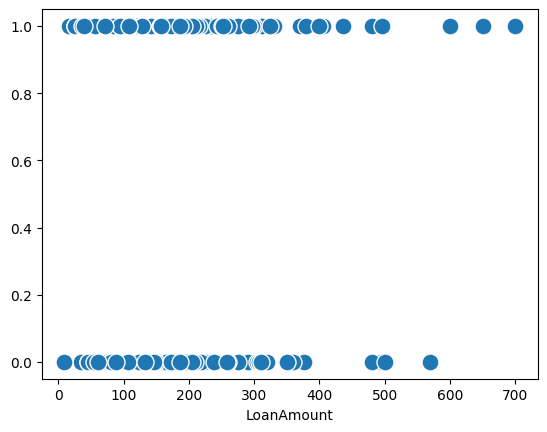

In [110]:
plot=sns.scatterplot(y= np.where(df["Loan_Status"]=="N", 0, 1), x=df["LoanAmount"], s=150)

# **3. Preparation of the Data**

In [111]:
# Y for dependent variable(Response)
y=df[["Loan_Status"]]
y

,Loan_Status
1,N
2,Y
3,Y
4,Y
5,Y
...,...
609,Y
610,Y
611,Y
612,Y


In [112]:
# X for indenpendent variables(Predictors)
x=df[["ApplicantIncome","LoanAmount"]]
x=x.dropna(subset=["LoanAmount"])
x

,ApplicantIncome,LoanAmount
1,4583,128.0
2,3000,66.0
3,2583,120.0
4,6000,141.0
5,5417,267.0
...,...,...
609,2900,71.0
610,4106,40.0
611,8072,253.0
612,7583,187.0


In [115]:
from sklearn.model_selection import train_test_split

In [116]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, stratify=y, random_state=123)

In [117]:
x_train.shape

(473, 2)

In [118]:
x_train.shape
x_test.shape

(119, 2)

# **4. Training and Evaluating the Model**

In [119]:
from sklearn.linear_model import LogisticRegression

In [120]:
classifier = LogisticRegression()

In [121]:
model = classifier.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [125]:
model.predict(x_test)

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y'], dtype=object)

In [126]:
model.score(x_test,y_test)

0.6974789915966386

In [127]:
#Confusion maatrix generation for better understanding
from sklearn.metrics import confusion_matrix

In [128]:
confusion_matrix(y_test, model.predict(x_test))

array([[ 0, 36],
       [ 0, 83]])

# **5. Interpret the Model**

In [131]:
model.intercept_

array([5.21355674e-05])

In [141]:
model.coef_

array([[-4.13042989e-06,  4.85244183e-03]])

In [135]:
log_odds = np.round(model.coef_[0],3)
log_odds

array([-0.   ,  0.005])

In [136]:
#Creating the pandas DataFrame using the coefficient values and the column names
pd.DataFrame({"log odds": log_odds}, index = x.columns)

,log odds
ApplicantIncome,-0.000
LoanAmount,0.005


In [138]:
odds=np.round(np.exp(log_odds),3)
pd.DataFrame({"Odds": odds}, index = x.columns)

,Odds
ApplicantIncome,1.000
LoanAmount,1.005
